In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myntra-products-dataset/myntra202305041052.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/kaggle/input/myntra-products-dataset/myntra202305041052.csv')
df

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
...,...,...,...,...,...,...,...,...,...,...,...
1060208,1060209,Men Slim Tapered Fit Jeans,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,1199.0,2399.0,4.3,44,50,Flying Machine,https://www.myntra.com/jeans/flying-machine/fl...
1060209,1060210,Men Skinny Fit Jeans,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,574.0,2299.0,3.8,34,75,Mast & Harbour,https://www.myntra.com/jeans/mast--harbour/mas...
1060210,1060211,Men Printed Shorts,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,799.0,1599.0,3.9,8,50,WROGN ACTIVE,https://www.myntra.com/shorts/wrogn-active/wro...
1060211,1060212,Men Skinny Fit Jeans,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,1199.0,1999.0,3.8,592,40,Roadster,https://www.myntra.com/jeans/roadster/roadster...


# Checking missing values-

In [4]:
df.isnull().sum()

id             0
name           0
img            0
asin           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
purl           0
dtype: int64

# EDA-

In [5]:
df.index

RangeIndex(start=0, stop=1060213, step=1)

In [6]:
df.columns

Index(['id', 'name', 'img', 'asin', 'price', 'mrp', 'rating', 'ratingTotal',
       'discount', 'seller', 'purl'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


In [8]:
df.shape

(1060213, 11)

In [9]:
df.size

11662343

# Drop some unnecessary columns-

In [10]:
df.drop(['id', 'img', 'asin', 'purl'], inplace=True, axis=1)

In [11]:
df

,name,price,mrp,rating,ratingTotal,discount,seller
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster
...,...,...,...,...,...,...,...
1060208,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine
1060209,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour
1060210,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE
1060211,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster


# Renaming columns-

In [12]:
df.rename({'name':'Product Name', 'price':'Price', 'mrp':'MRP', 'rating':'Ratings', 'ratingTotal':'Total ratings', 'discount':'Discount', 'seller':'Brand'}, inplace=True, axis=1)

In [13]:
df['Brand'].unique()[0:100]

array(['Difference of Opinion', 'Roadster', 'DILLINGER', 'Huetrap',
       'HELLCAT', 'HRX by Hrithik Roshan', 'VEIRDO',
       'Louis Philippe Sport', 'Moda Rapido', 'Urbano Fashion',
       'U.S. Polo Assn.', 'Puma', 'HERE&NOW', 'Nautica', 'H&M',
       'Bonkers Corner', 'Kook N Keech', 'BRINNS', 'Wool Trees', 'Okane',
       'WEAVETECH IMPEX', 'Sztori', 'Styli', 'Urban Revivo', 'Kanvin',
       'ELLIS', 'RAASSIO', 'GUTI', 'TAG 7', 'Mast & Harbour',
       'Sweet Dreams', 'DressBerry', 'SHEETAL Associates', 'SASSAFRAS',
       'LYRA', 'Jinfo', 'NEUDIS', 'Juniper', 'ADIDAS', 'SUMAVI-FASHION',
       'BoStreet', 'Frempy', 'T-SHIRT TRUCK', 'Nimble', 'Disrupt',
       'MODWEE', 'urSense', 'Vero Moda', 'GRIIHAM', 'RESIST EYEWEAR',
       'Aazeen', 'MYKI', 'Hair Flare', 'MAGNEQ', 'MANSIYAORANGE',
       'CRUSSET', 'FRENCH ESSENCE', 'PALMONAS', 'Silvermerc Designs',
       'ROFARWORD', 'Peora', 'SOHI', 'Samridhi DC', 'Sukkhi', 'Metro',
       'Vita Bella', 'RUHI COLLECTION', '20Dresses', 'A

In [139]:
df

,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster
...,...,...,...,...,...,...,...
1060208,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine
1060209,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour
1060210,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE
1060211,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster


# Product name column-

In [15]:
df['Product Name'].value_counts()

Men Polo Collar T-shirt                    5644
Gold-Plated Jewellery Set                  5485
Men Typography Printed T-shirt             4326
Printed Round Neck T-shirt                 4055
Men Slim Fit Jeans                         4046
                                           ... 
Empire Tiered Mini Dress                      1
Women Slim Jogger Fit Jeans                   1
Mini Dress With Lace Inserts                  1
Abstract Waistline Dress                      1
Men Checked Slim Fit Cotton Track Pants       1
Name: Product Name, Length: 217738, dtype: int64

In [140]:
df1=df['Product Name'].value_counts().head(10)
df1

Men Polo Collar T-shirt           5644
Gold-Plated Jewellery Set         5485
Men Typography Printed T-shirt    4326
Printed Round Neck T-shirt        4055
Men Slim Fit Jeans                4046
Men Printed T-shirt               3874
Men Pure Cotton T-shirt           3763
Women Analogue Watch              3649
Women Open Toe Flats              2940
Women Night suit                  2923
Name: Product Name, dtype: int64

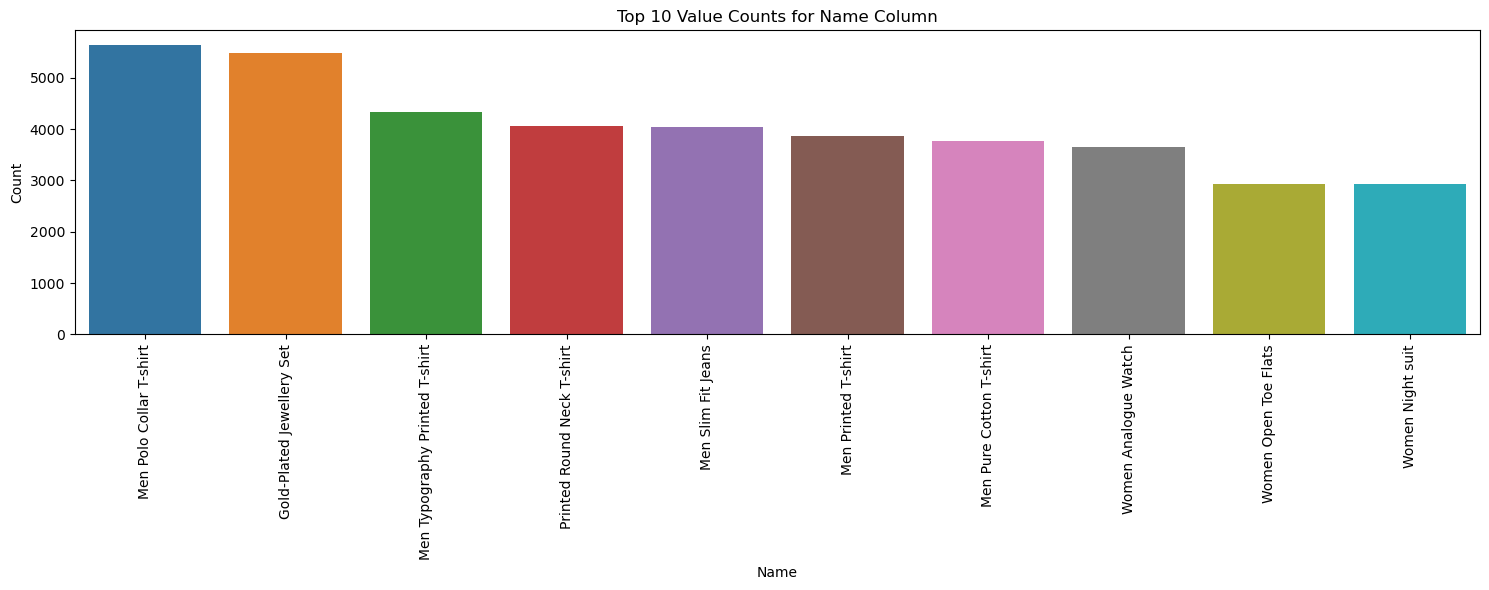

In [141]:
#Highest selling product
plt.figure(figsize=(15, 6))
sns.barplot(x=df1.index, y=df1.values)
plt.xticks(rotation=90)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 10 Value Counts for Name Column')
plt.tight_layout()

In [142]:
# Top 10 most expensive products-
x=df.groupby('Product Name')[['Price']].sum().reset_index().sort_values(ascending=False, by='Price').head(10)
x

,Product Name,Price
193703,Women Analogue Watch,15210635.0
86777,Men Analogue Watch,10186233.0
211967,Women Stainless Steel Straps Watch,9687460.0
102928,Men Slim Fit Jeans,7163082.0
145460,Semi-Stitched Lehenga Unstitched Blouse With D...,6596997.0
60155,Gold-Plated Jewellery Set,6575932.0
98946,Men Polo Collar T-shirt,6315232.0
3223,18KT Gold Diamond Finger Ring,6014064.0
104961,Men Stainless Steel Straps Watch,5892178.0
76600,Kurta with Trousers & Dupatta,5377003.0


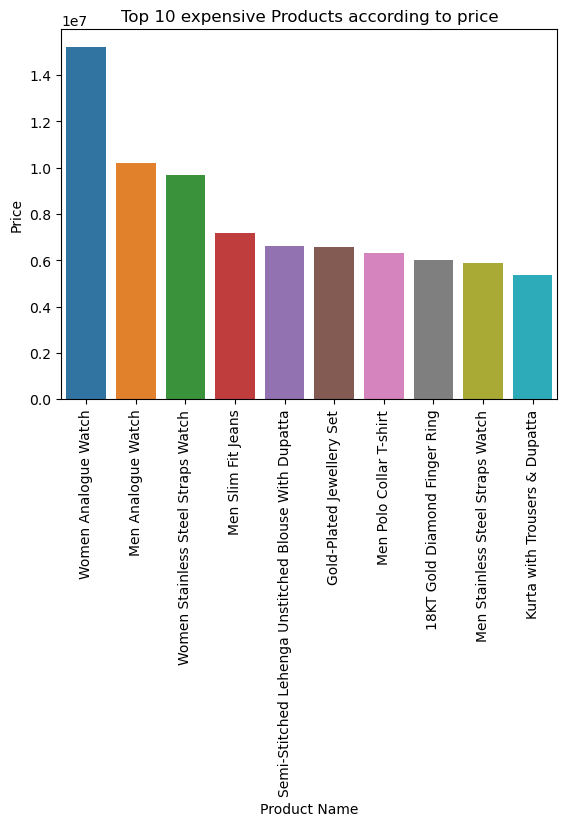

In [143]:
sns.barplot(x='Product Name', y='Price', data=x);
plt.xticks(rotation=90);
plt.title('Top 10 expensive Products according to price');


In [144]:
#Most expensive product-
df['Price'].max()
x=df[df['Price']==257500.0]
x


,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand
26184,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,0,Versace
345950,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,0,Versace
447028,Bracelet Style Analogue Watch,257500.0,257500.0,0.0,0,0,Versace


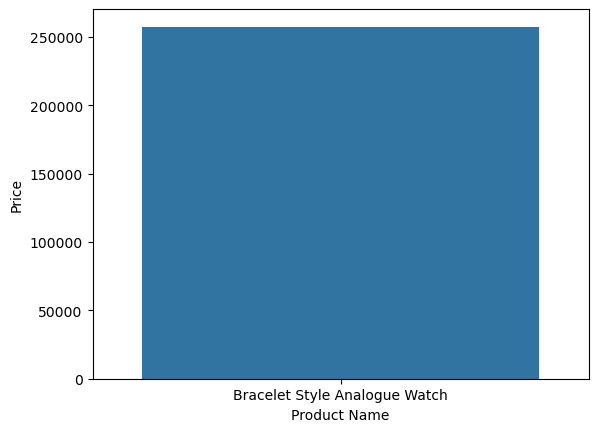

In [145]:
sns.barplot(x='Product Name', y='Price', data=x);

In [146]:

# x=df['Product Name'].str.split(' ')
# df['product_cat']=pd.Series([i[-1] for i in x ])
# df.groupby('product_cat')['product_cat'].count()
# df1=df[df['Product Name'].str.contains('T-shirt')]
# df2=df[df['Product Name'].str.contains('Jeans')]
# df=df2['Product Name']

In [147]:
# df['product_cat'].unique()

In [148]:
# df = df[~df['product_cat'].str.contains(r'\d+\w+')]
# df = df[~df['product_cat'].str.contains('&')]
# df = df[~df['product_cat'].str.contains('#')]
# df = df[~df['product_cat'].str.contains()]
# (df.groupby('product_cat')['Ratings'].mean()==0)
# df['product_cat'].unique()[:100]

# Price column-

In [22]:
df

,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster
...,...,...,...,...,...,...,...
1060208,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine
1060209,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour
1060210,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE
1060211,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster


In [149]:
df2=df['Price'].value_counts().head(10)
df2

599.0     24663
999.0     22751
499.0     18696
799.0     17605
399.0     16831
899.0     16683
699.0     14982
1499.0    11981
1199.0    11005
449.0     10592
Name: Price, dtype: int64

In [150]:
#the range (difference between maximum and minimum) of prices in the dataset-
x=df['Price'].max()-df['Price'].min()
x

257475.0

In [151]:
#the average price of products-
df.groupby('Product Name')['Price'].mean()

Product Name
 Boys Top with Pyjamas             799.0
 Bralette Bra                      411.0
 Eyeshadow Palette                 849.0
!28 TC Cotton Bedsheet            2324.0
"Selfie Wala Bhai" Rakhi           483.0
                                   ...  
x RCB Arcade T-shirt              1599.0
x The Lion King Eyeshadow          687.0
x Women Black Analogue Watch      3596.0
x1Der Core Pants II               2029.0
xThebe Magugu 000 T Sweatshirt    4799.0
Name: Price, Length: 217738, dtype: float64

In [182]:
#price distributed across different brands-
df.groupby('Brand')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
109F,33.0,1054.303030,226.256697,584.0,899.0,1019.0,1139.0,1624.0
1st Step,125.0,3437.720000,2316.222932,269.0,1799.0,3099.0,5499.0,10499.0
2 STRAP,1.0,6499.000000,NaN,6499.0,6499.0,6499.0,6499.0,6499.0
20Dresses,803.0,1568.886675,701.187783,178.0,1121.0,1435.0,2065.0,4196.0
250 DESIGNS,121.0,1641.595041,1370.466268,774.0,999.0,1119.0,1499.0,9999.0
...,...,...,...,...,...,...,...,...
x2o,245.0,629.742857,309.185596,246.0,405.0,597.0,749.0,2599.0
yelloe,40.0,951.450000,353.890389,345.0,778.0,855.0,985.5,1990.0
yellowsoles,6.0,2549.000000,539.444158,1899.0,2049.0,2749.0,2999.0,2999.0


-0.014116971644750604

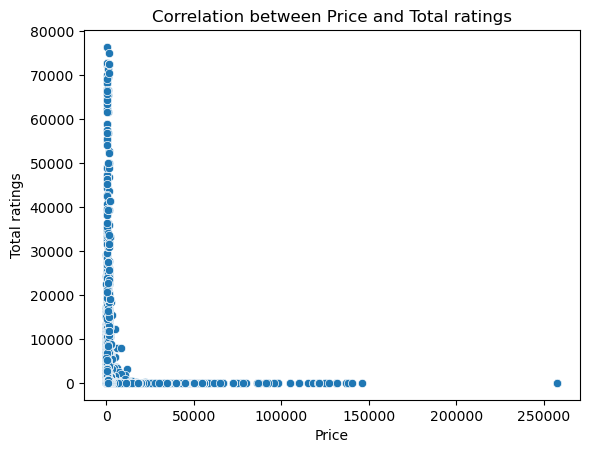

In [158]:
#the price of a product correlate with its total ratings-
correlation = df['Price'].corr(df['Total ratings'])
display(correlation)
sns.scatterplot(data=df, x='Price', y='Total ratings')
plt.xlabel('Price')
plt.ylabel('Total ratings')
plt.title('Correlation between Price and Total ratings');

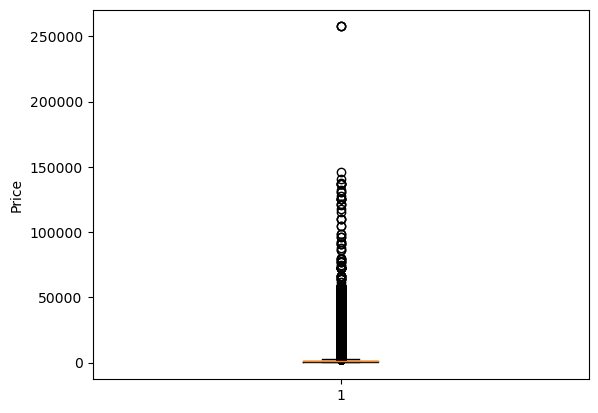

In [159]:
#Are there any outliers in terms of price-
plt.boxplot(df['Price'])
plt.ylabel('Price');

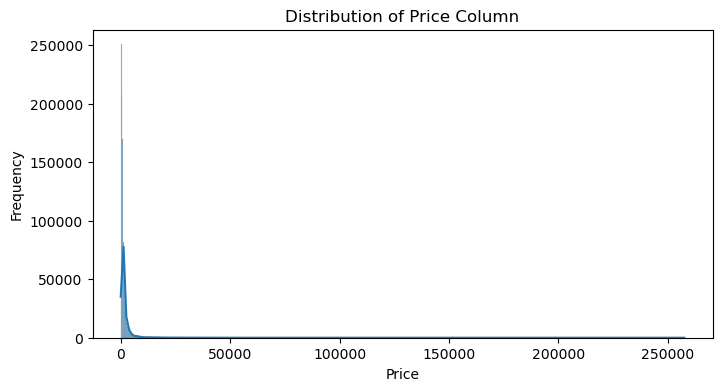

In [160]:
#the distribution of product prices in df-
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins =1000, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price Column');

# MRP Column-

In [162]:
df['MRP'].describe()

count    1.060213e+06
mean     2.668379e+03
std      3.877900e+03
min      2.500000e+01
25%      9.990000e+02
50%      1.780000e+03
75%      2.999000e+03
max      2.575000e+05
Name: MRP, dtype: float64

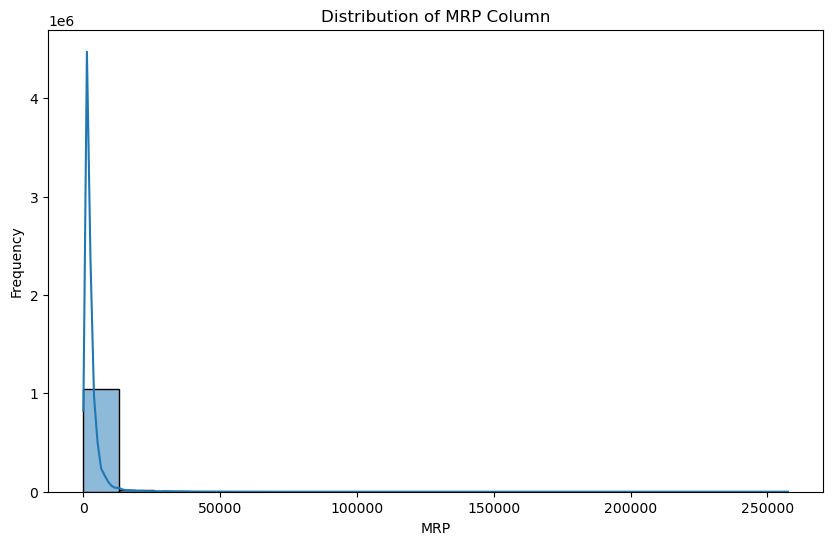

In [163]:
#distribution of product MRP in df-
plt.figure(figsize=(10, 6))
sns.histplot(df['MRP'], bins=20, kde=True)
plt.xlabel('MRP')
plt.ylabel('Frequency')
plt.title('Distribution of MRP Column');

In [164]:
#maximun difference between price and MRP-
df['Diff_MRP_Price']=df['MRP']-df['Price']
df['Diff_MRP_Price'].max()
x=df[df['Diff_MRP_Price']==62370]
x

,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand,Diff_MRP_Price
617488,Ready to Wear Lehenga Blouse With Dupatta,36629.0,98999.0,0.0,0,63,Phenav,62370.0


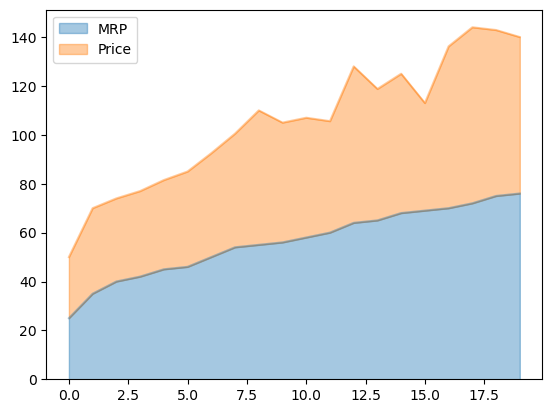

In [165]:
#difference between MRP and Price-
x=df.groupby('MRP')[['Price']].mean().reset_index().head(20)
x
x.plot.area(alpha=0.4);

In [166]:
#minimum difference between price and MRP-
df['Diff_MRP_Price']=df['MRP']-df['Price']
df['Diff_MRP_Price'].min()
x=df[df['Diff_MRP_Price']==0]
x

,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand,Diff_MRP_Price
25,Men Polo Collar Slim Fit T-shirt,1699.0,1699.0,4.5,295,0,U.S. Polo Assn.,0.0
36,Women White Wide T-shirt,699.0,699.0,4.2,780,0,H&M,0.0
54,Lace Inserted Pure Cotton Top,1999.0,1999.0,0.0,0,0,Sztori,0.0
56,Shirt Collar Checked Dress,1649.0,1649.0,0.0,0,0,Styli,0.0
59,Flared Sleeve Maxi Dress,1449.0,1449.0,0.0,0,0,Styli,0.0
...,...,...,...,...,...,...,...,...
1060161,Unisex Rectangle Sunglasses with UV Protected ...,2950.0,2950.0,0.0,0,0,OPIUM,0.0
1060167,Men Pure Cotton Shorts,1999.0,1999.0,0.0,0,0,FORCE IX,0.0
1060168,Men Slim Fit Jeans,1799.0,1799.0,0.0,0,0,Flying Machine,0.0
1060170,Men Skinny Fit Trousers,1799.0,1799.0,0.0,0,0,Turtle,0.0


# Rating column-

In [167]:
#calculations on Rating columns-
df['Ratings'].describe()

count    1.060213e+06
mean     1.060150e+00
std      1.829632e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.800000e+00
max      5.000000e+00
Name: Ratings, dtype: float64

In [168]:
#products with highest ratings-
df['Ratings'].max()
x=df[df['Ratings']==5.0]
x

,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand,Diff_MRP_Price
271,Seamless Skirt Shapewear,690.0,1725.0,5.0,2,60,SECRETS BY ZEROKAATA,1035.0
272,Seamless Shapewear Skirt,690.0,1725.0,5.0,2,60,SECRETS BY ZEROKAATA,1035.0
273,Seamless Skirt Shapewear,690.0,1725.0,5.0,2,60,SECRETS BY ZEROKAATA,1035.0
274,4 Way Stretch Churidar Length Leggings,594.0,1450.0,5.0,2,59,SECRETS BY ZEROKAATA,856.0
275,4 Way Stretch Cotton Leggings,594.0,1450.0,5.0,2,59,SECRETS BY ZEROKAATA,856.0
...,...,...,...,...,...,...,...,...
1060002,Men Regular Shorts,1034.0,2299.0,5.0,5,55,Jack & Jones,1265.0
1060111,180 TC 1 Single Bedsheet with 1 Pillow Covers,1274.0,1499.0,5.0,5,15,House This,225.0
1060124,Men Patterned Muffler,854.0,1899.0,5.0,5,55,Alvaro Castagnino,1045.0
1060171,Men Slim Tapered Fit Jeans,1649.0,2999.0,5.0,6,45,Flying Machine,1350.0


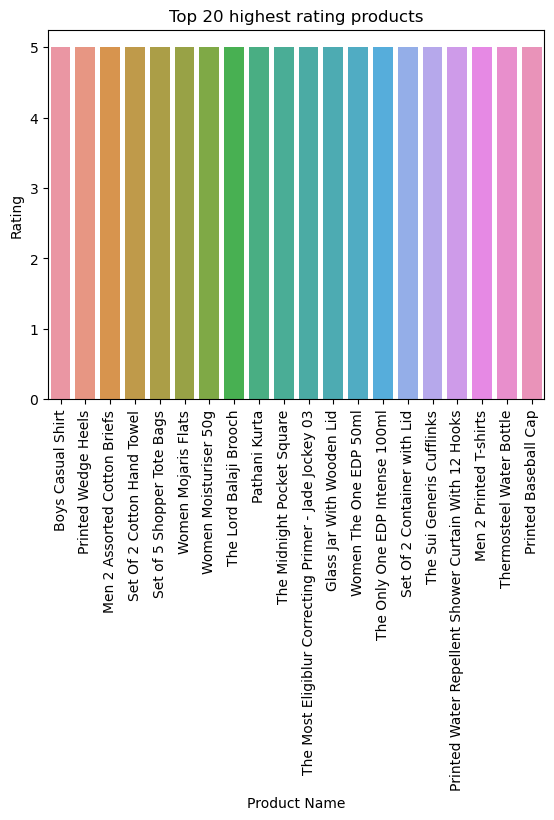

In [169]:
#top 20 highest rating products-
x=df.groupby('Product Name')[['Ratings']].max().reset_index().sort_values(ascending=False, by='Ratings').head(20)
sns.barplot(x='Product Name', y='Ratings', data=x);
plt.ylabel('Rating')
plt.title('Top 20 highest rating products')
plt.xticks(rotation=90);

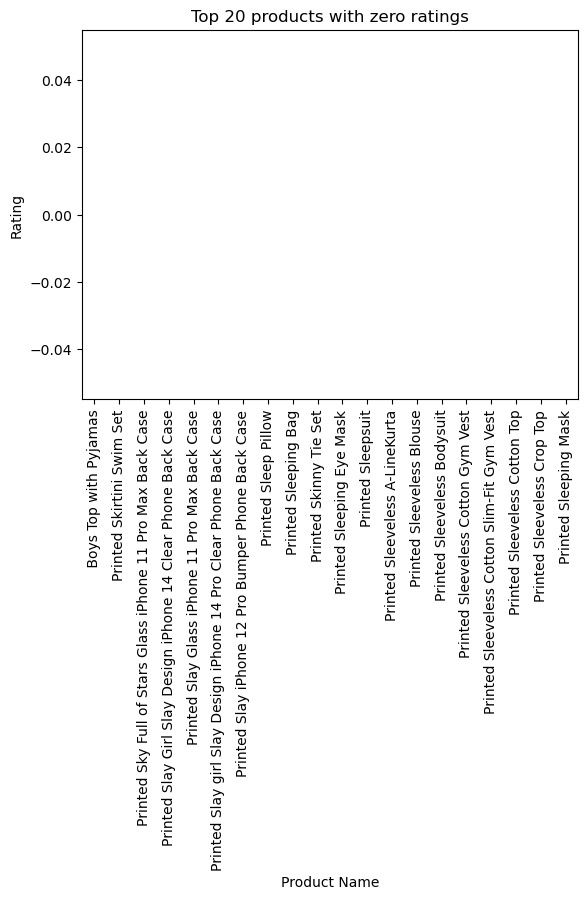

In [170]:
#top 20 products with zero ratings-
x=df.groupby('Product Name')[['Ratings']].min().reset_index().sort_values(by='Ratings').head(20)
sns.barplot(x='Product Name', y='Ratings', data=x);
plt.ylabel('Rating')
plt.title('Top 20 products with zero ratings')
plt.xticks(rotation=90);

In [171]:
#the overall distribution of ratings across different price ranges-
# x = df.groupby('Price')['Ratings'].mean()
# plt.bar(x.index.astype(str), x)
# plt.xlabel('Price Range')
# plt.ylabel('Average Rating')
# plt.title('Distribution of Ratings across Price Ranges')
# plt.xticks(rotation=45);

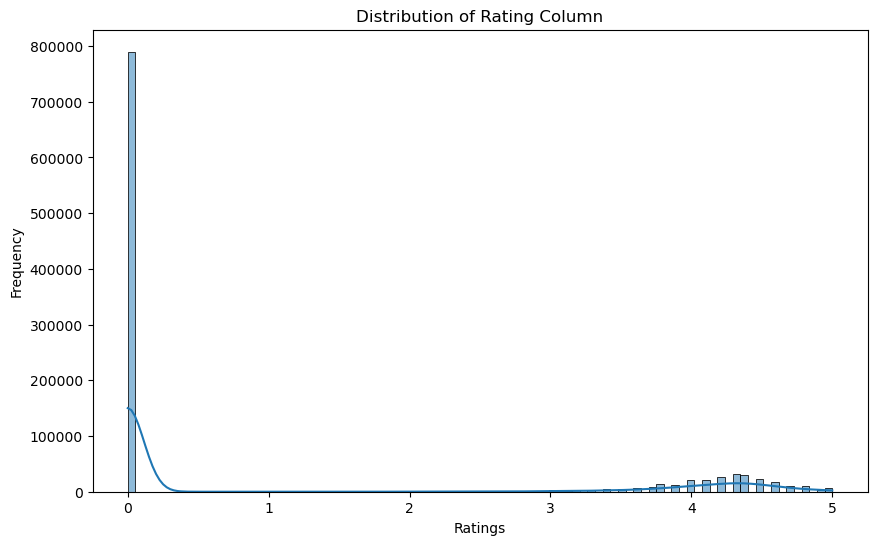

In [179]:
#distribution of ratings column-
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], kde=True)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Column');

-0.10108359686802089

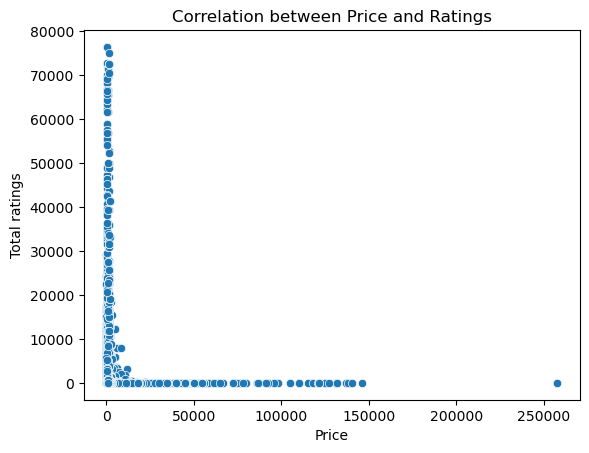

In [173]:
correlation = df['Price'].corr(df['Ratings'])
display(correlation)
sns.scatterplot(data=df, x='Price', y='Total ratings')
plt.xlabel('Price')
plt.ylabel('Total ratings')
plt.title('Correlation between Price and Ratings');

In [174]:
#Ratings with highest discount-
x=df.groupby('Ratings')[['Discount']].mean().reset_index()

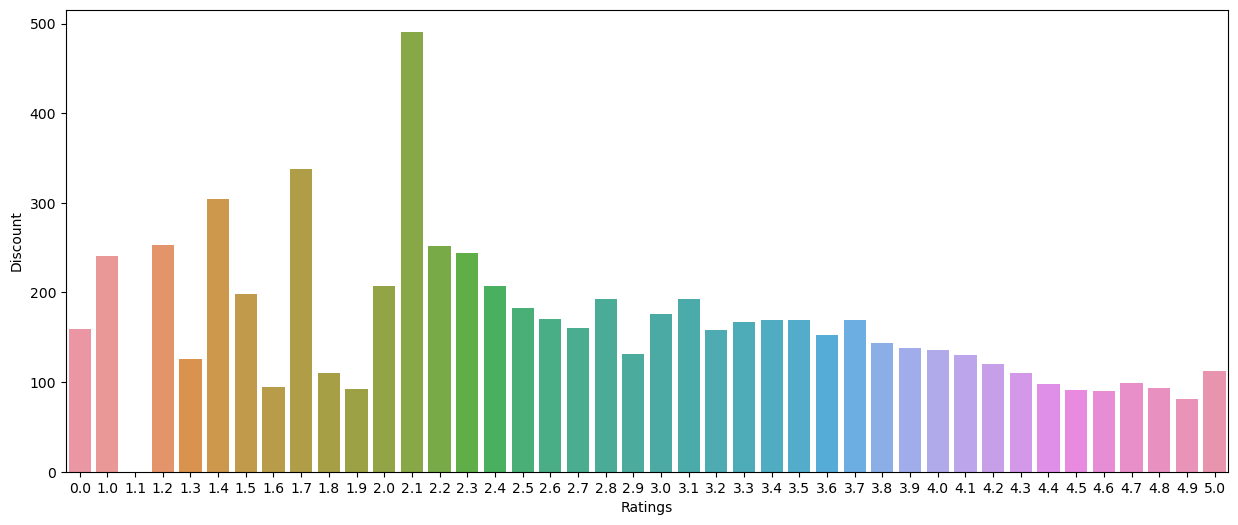

In [175]:
plt.figure(figsize=(15,6));
sns.barplot(x='Ratings', y='Discount', data=x);

In [176]:
df

,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand,Diff_MRP_Price
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,767.0
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,225.0
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,648.0
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,803.0
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,405.0
...,...,...,...,...,...,...,...,...
1060208,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine,1200.0
1060209,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour,1725.0
1060210,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE,800.0
1060211,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster,800.0


# Total Rating-

In [177]:
df['Total ratings'].describe()

count    1.060213e+06
mean     4.189618e+01
std      7.476645e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      7.640000e+04
Name: Total ratings, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Rating Column')

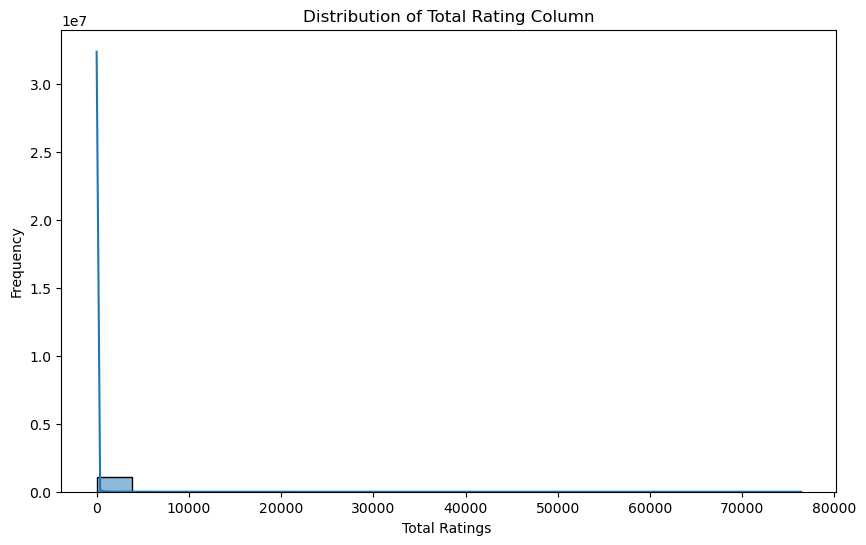

In [181]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total ratings'],bins=20, kde=True)
plt.xlabel('Total Ratings ')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rating Column')

In [84]:
#Products with highest total ratings-
top_products = df.nlargest(20, 'Total ratings')
print(top_products[['Product Name', 'Total ratings']])

                                 Product Name  Total ratings
271611            Toner-Lotion-Cream-Lip Balm          76400
375328            Toner-Lotion-Cream-Lip Balm          76400
950168          Men Pack of 2 Printed T-shirt          75100
254775              Unisex Skin Care Gift Set          72700
353233              Unisex Skin Care Gift Set          72700
950167             Pack Of 2 Printed T-shirts          72600
989446             Pack Of 2 Printed T-shirts          72600
990061  Pack Of 2 Printed Pure Cotton T-shirt          72500
88090            Toner-Sunscreen-Lotion-Cream          72400
232773           Sustainable Skin & Hair Care          71300
325172           Sustainable Skin & Hair Care          71300
997932          Men Pack Of 2 Printed TShirts          70500
180995              Unisex Skin Care Gift Set          70100
271544               Set of 3 Makeup Gift Set          69500
230588                Serum-Toner-Scrub-Cream          69100
322622                Se

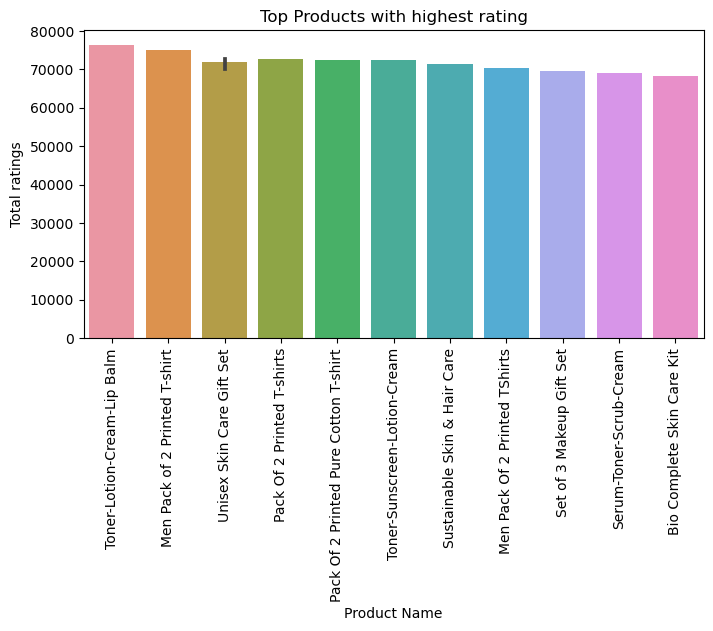

In [93]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90);
sns.barplot(x='Product Name', y='Total ratings', data=top_products)
plt.xlabel('Product Name')
plt.ylabel('Total ratings')
plt.title('Top Products with highest rating');


In [102]:
#Product average price with highest total ratings-
x=df.groupby('Price')['Total ratings'].mean().reset_index().sort_values(ascending=False, by='Total ratings').head(20)

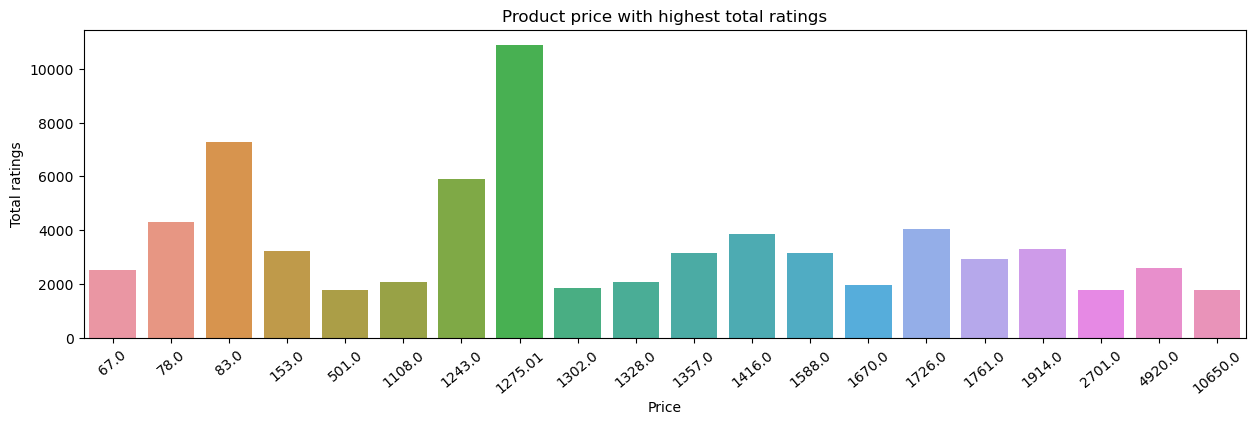

In [104]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=40);
sns.barplot(x='Price', y='Total ratings', data=x);
plt.title('Product price with highest total ratings');

In [112]:
#product average price with highest discount-
x=df.groupby('Price')[['Discount']].mean().reset_index().nlargest(20, 'Discount')

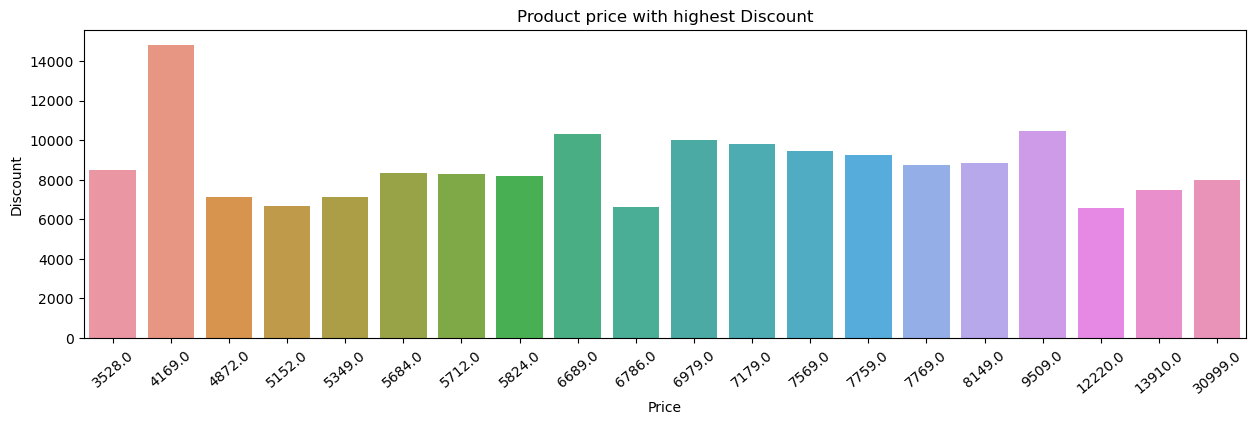

In [111]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=40);
sns.barplot(x='Price', y='Discount', data=x);
plt.title('Product price with highest Discount');

# Discount column-

In [76]:
df['Discount'].describe()

count    1.060213e+06
mean     1.496420e+02
std      5.648781e+02
min      0.000000e+00
25%      1.500000e+01
50%      5.000000e+01
75%      6.800000e+01
max      1.999600e+04
Name: Discount, dtype: float64

Text(0.5, 1.0, 'Distribution of Discount Column')

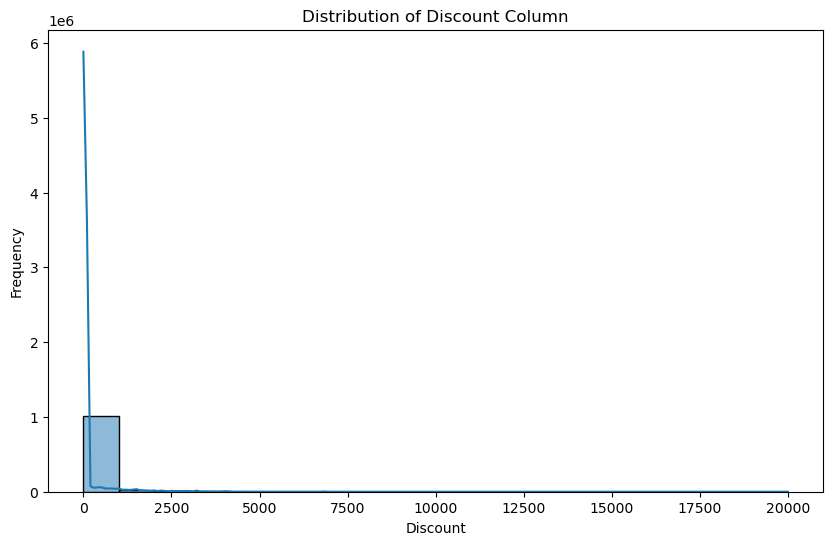

In [113]:
#Distribution of discount column-
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], bins=20, kde=True)
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Column')

In [116]:
#Top products with highest discount-
top_products = df.nlargest(20, 'Discount')
print(top_products[['Product Name', 'Discount']])

                                     Product Name  Discount
235289                  Gold-Plated Jewellery Set     19996
269783                  Gold-Plated Jewellery Set     19996
706382  Ready to Wear Lehenga Blouse With Dupatta     18501
714474  Ready to Wear Lehenga Blouse With Dupatta     18501
728478                Ready to Wear Lehenga Choli     18501
728486                Ready to Wear Lehenga Choli     18501
729216                Ready to Wear Lehenga Choli     18501
729777                Ready to Wear Lehenga Choli     18501
828270    Floral Printed Pure Silk Ethnic Dresses     18501
881286  Ready to Wear Lehenga Blouse With Dupatta     18501
905547  Ready to Wear Lehenga Blouse With Dupatta     18501
20152                  Set of 3 Trolley Suitcases     18100
117200                 Set of 3 Trolley Suitcases     18100
119891                 Set of 3 Trolley Suitcases     18100
491588              Embroidered Gown Ethnic Dress     17501
966582                  Ethnic Dress Wit

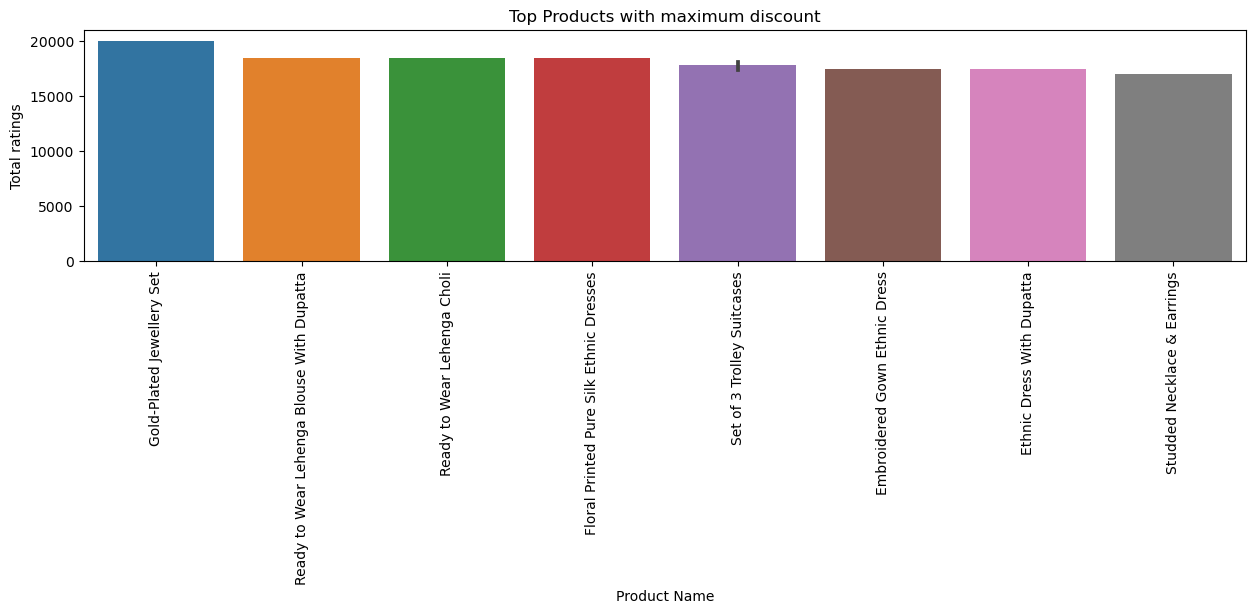

In [126]:
plt.figure(figsize=(15, 3))
sns.barplot(x='Product Name', y='Discount', data=top_products)
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Total ratings')
plt.title('Top Products with maximum discount');

0.09442068499189671

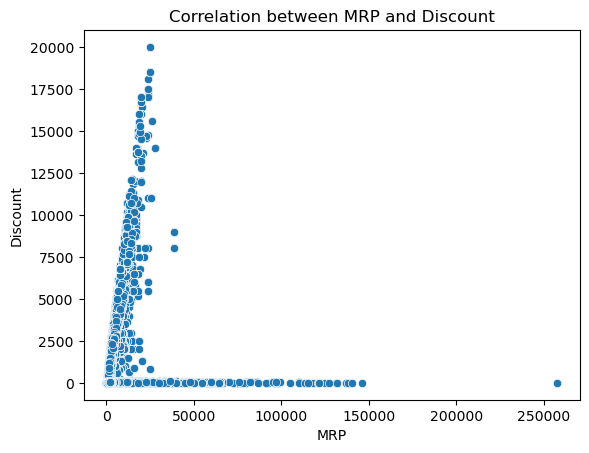

In [128]:
correlation = df['MRP'].corr(df['Discount'])
display(correlation)
sns.scatterplot(data=df, x='MRP', y='Discount')
plt.xlabel('MRP')
plt.ylabel('Discount')
plt.title('Correlation between MRP and Discount');

# Brand column-

In [84]:
Brand_counts = df['Brand'].value_counts()
print(Brand_counts)

Roadster           10651
H&M                 6667
Puma                6579
max                 6486
Anouk               6158
                   ...  
Auggmin                1
BS AMOR                1
Bodyguard              1
TRU HAIR               1
Zainab chottani        1
Name: Brand, Length: 5496, dtype: int64


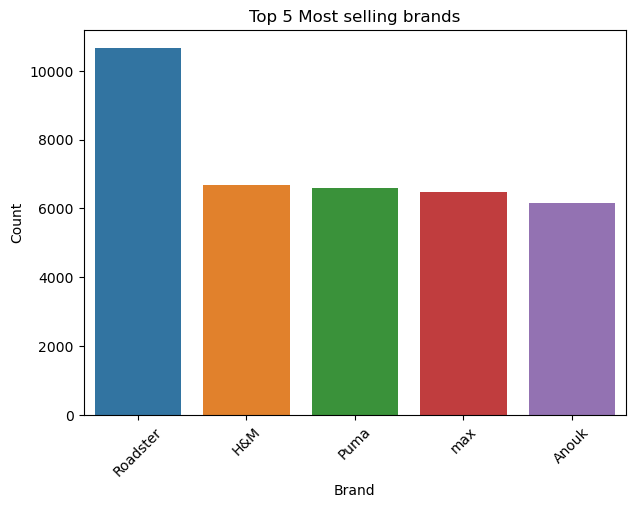

In [186]:
#Most selling brands-
top_5_sellers = df['Brand'].value_counts().head(5)
plt.figure(figsize=(7, 5))
sns.barplot(x=top_5_sellers.index, y=top_5_sellers.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 5 Most selling brands')
plt.xticks(rotation=45);

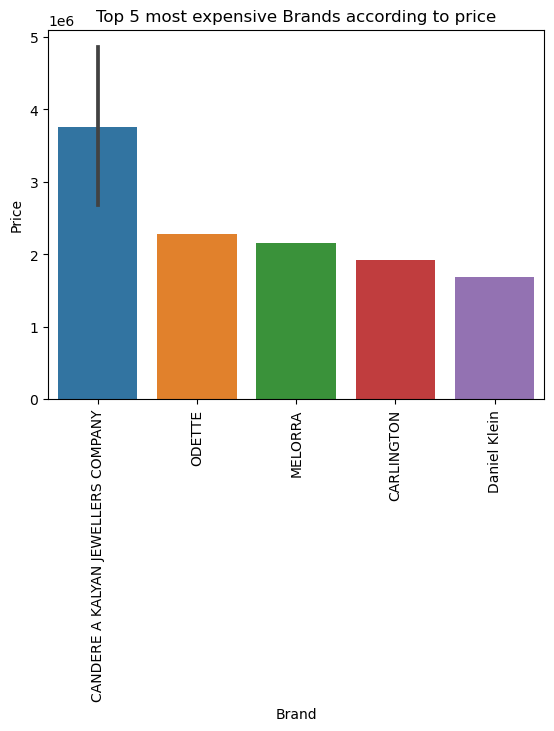

In [187]:
#Top most expensive brand acoording to the selling price-
x=df.groupby(['Brand', 'Product Name'])[['Price']].sum().reset_index().sort_values(ascending=False, by='Price').head(10)
sns.barplot(x='Brand', y='Price', data=x);
plt.xticks(rotation=90);
plt.title('Top 5 most expensive Brands according to price');

In [196]:
#Brands with highest average discount-
x=df.groupby('Brand')[['Discount']].mean().reset_index().nlargest(20, 'Discount')

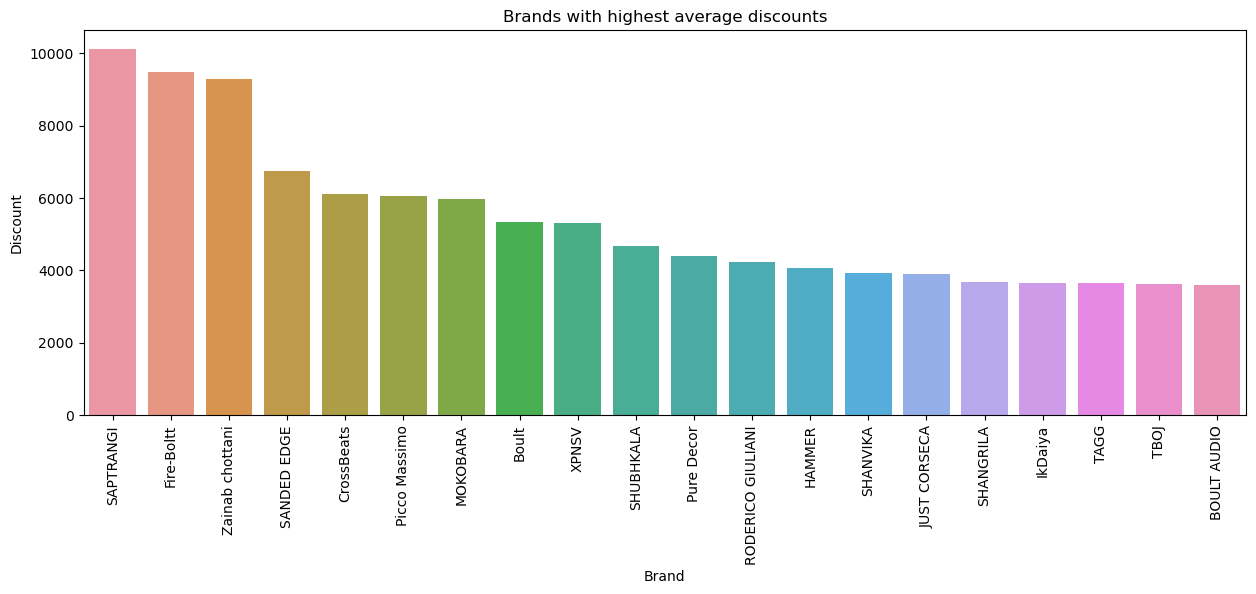

In [199]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='Brand', y='Discount', data=x);
plt.title('Brands with highest average discounts');

# Discount Price column-

In [209]:
df['Discount_Price']=df['Price']*(df['Discount']/100)
df

,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand,Diff_MRP_Price,Discout Price,Discount_Price
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,767.0,313.88,313.88
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,225.0,123.30,123.30
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,648.0,297.54,297.54
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,803.0,216.08,216.08
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,405.0,222.30,222.30
...,...,...,...,...,...,...,...,...,...,...
1060208,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine,1200.0,599.50,599.50
1060209,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour,1725.0,430.50,430.50
1060210,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE,800.0,399.50,399.50
1060211,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster,800.0,479.60,479.60


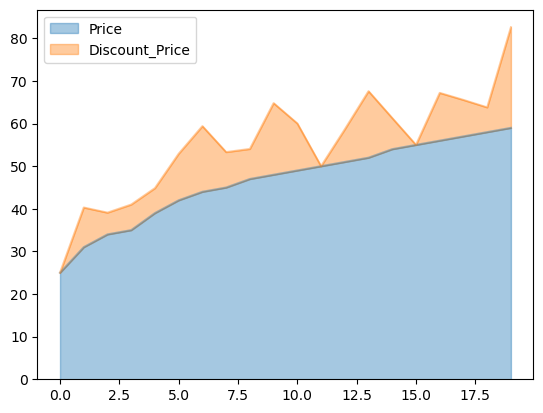

In [226]:
#Difference between discount price and selling price-
x=df.groupby('Price')[['Discount_Price']].mean().reset_index().head(20)
x.plot.area(alpha=0.4);

In [222]:
df

,Product Name,Price,MRP,Ratings,Total ratings,Discount,Brand,Discount_Price
0,Men Solid Oversized Cotton,532.0,1299.0,4.1,5300,59,Difference of Opinion,313.88
1,Men Cotton Pure Cotton T-shirt,274.0,499.0,4.2,25400,45,Roadster,123.30
2,Women Pure Cotton T-shirt,551.0,1199.0,4.5,3400,54,DILLINGER,297.54
3,Typography Print T-shirt,296.0,1099.0,4.0,18400,73,Huetrap,216.08
4,Printed Round Neck Pure Cotton T-shirt,494.0,899.0,4.2,3800,45,Roadster,222.30
...,...,...,...,...,...,...,...,...
1060208,Men Slim Tapered Fit Jeans,1199.0,2399.0,4.3,44,50,Flying Machine,599.50
1060209,Men Skinny Fit Jeans,574.0,2299.0,3.8,34,75,Mast & Harbour,430.50
1060210,Men Printed Shorts,799.0,1599.0,3.9,8,50,WROGN ACTIVE,399.50
1060211,Men Skinny Fit Jeans,1199.0,1999.0,3.8,592,40,Roadster,479.60
